# Dipole EMission on Substate (Thin Sub)

This is a simple implementation of dipole emission on substate.

## Simple Test

In [23]:
import numpy as np
import datetime
from class_BFP_Image_QD import BFP_Image_QD
from scipy.optimize import curve_fit
import Fun_BFP_Image
import matplotlib.pyplot as plt

In [24]:
WL0 = 655e-9
nUp = 2
nDn = 3

indexsub=1.4564

p0 = np.array([0, 0, 1])

# To simulate the upper space
# -------------------------------------------------------------------------------------
# Initialize the coordinate for each layer
# The dipole should be better in the coordinate z=0
dl = np.zeros((nUp + nDn, 1))
dis = 4e-9


dl[4] = 300e-9
dl[3] = 200e-9
dl[2] = 120e-9
dl[1] = 20e-9
dl[0] = 0e-9

# The position of the dipole
POSD = dl[nDn - 1] + dis


# Initialize the permitivity
Eplist = np.zeros((nUp + nDn + 1, 1), dtype=complex)


Eplist[5] = 1
Eplist[4] = 1
Eplist[3] = 1
Eplist[2] = indexsub**2
Eplist[1] = 1
Eplist[0] = 1

DonSub = BFP_Image_QD(Eplist, dl, nUp, nDn, p0, WL0, POSD)

num_kx = 150
num_ky = 150

NA=1
# first interpolate to krho kphi
num_krho = num_kx
num_kphi = num_ky
krho = np.linspace(0 + 1e-5, 1 + 1e-5, num_kx) * DonSub.k0 * NA
kphi = np.linspace(0, 2*np.pi, num_kphi)
krho_grid, kphi_grid = np.meshgrid(krho, kphi)
kx_grid = krho_grid*np.cos(kphi_grid)
ky_grid = krho_grid*np.sin(kphi_grid)

2021-07-27 21:21:36:The Basic Parameters Have Been Initialized!!!


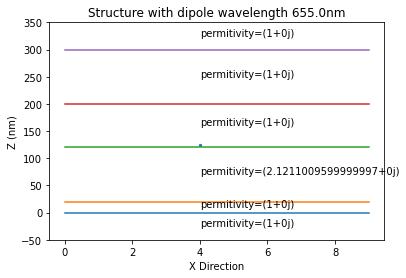

In [25]:
DonSub.Show_Structure()

In [26]:
# Initialize the Green Function
DonSub.Cal_Green_List(kx_grid, ky_grid)

2021-07-27 21:22:06: The Green Function Has Been Prepared


0

In [27]:
px=np.array([1.0, 0, 0])
py=np.array([0, 1.0, 0])
pz=np.array([0, 0, 1.0])

PatternUpDx,PatternDnDx = DonSub.Cal_Pattern_List_QD_p1(px)
PatternUpDy,PatternDnDy = DonSub.Cal_Pattern_List_QD_p1(py)
PatternUpDz,PatternDnDz = DonSub.Cal_Pattern_List_QD_p1(pz)

C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/3543706332.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(kx_grid,ky_grid,PatternUpDx, cmap='jet')
C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/3543706332.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(kx_grid,ky_grid,PatternUpDy, cmap='jet')
C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/3543706332.py:9: MatplotlibDeprecationWarning: shading='flat' whe

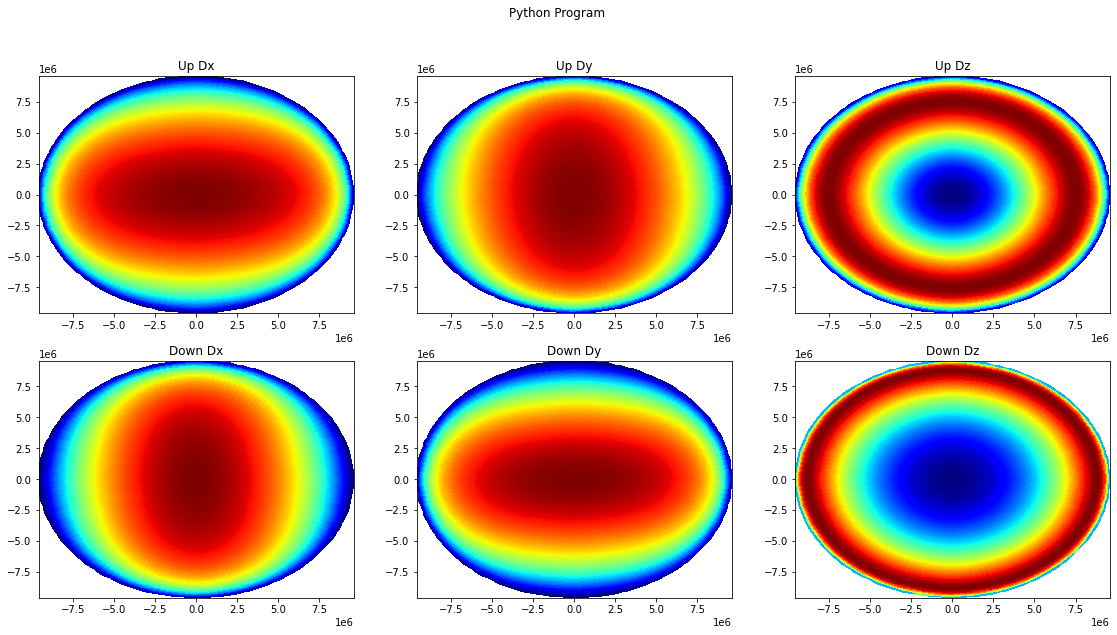

In [28]:
fig1 = plt.figure(figsize=(6.4*3,4.8*2))
plt.subplot(231)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDx, cmap='jet')
plt.title('Up Dx')
plt.subplot(232)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDy, cmap='jet')
plt.title('Up Dy')
plt.subplot(233)
plt.pcolormesh(kx_grid,ky_grid,PatternUpDz, cmap='jet')
plt.title('Up Dz')
plt.subplot(234)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDx, cmap='jet')
plt.title('Down Dx')
plt.subplot(235)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDy, cmap='jet')
plt.title('Down Dy')
plt.subplot(236)
plt.pcolormesh(kx_grid,ky_grid,PatternDnDz, cmap='jet')
plt.title('Down Dz')
plt.suptitle('Python Program')
plt.savefig('./Figures/PatternfordipoleoindexsubPythonThinFilm.png')
plt.show()

Show the 3D plots

C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/3373730122.py:4: RuntimeWarning: invalid value encountered in sqrt
  uz=np.sqrt(1-ux**2-uy**2)
C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/3373730122.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf1 = ax1.plot_surface(ux, uy, uz, cmap='jet')


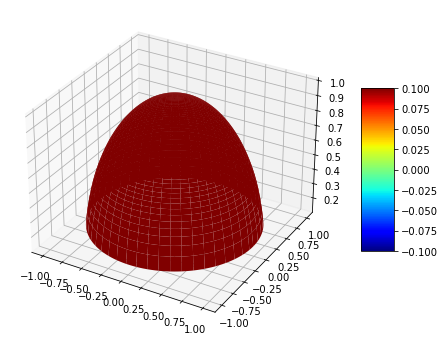

In [29]:
from mpl_toolkits.mplot3d import axes3d
ux=kx_grid/(DonSub.k0 * NA)
uy=ky_grid/(DonSub.k0 * NA)
uz=np.sqrt(1-ux**2-uy**2)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(ux, uy, uz, cmap='jet')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)


## Arbitrary 3D plots

Then we can plot th3 3D patterns for arbitray 3D dipole

In [30]:
# def Dipole3D(para):
#     alpha=para[0]
#     beta=para[1]
#     phix=para[2]
#     phiy=para[3]
#     phiz=para[4]
#     dx=np.transpose([1,0,0])
#     dy=np.transpose([0,alpha,0])
#     dz=np.transpose([0,0,beta])

#     norm=np.sqrt(1**2+alpha**2+beta**2)

#     rotation=np.zeros((3,3))
#     rotation[:,0]=np.transpose(np.array([np.cos(phiz)*np.cos(phiy),np.sin(phiz)*np.cos(phiy),-np.sin(phiy)]))
#     rotation[:,1]=np.transpose(np.array([np.cos(phiz)*np.sin(phiy)*np.sin(phix)-np.sin(phiz)*np.cos(phix),np.sin(phiz)*np.sin(phiy)*np.sin(phix)+np.cos(phiz)*np.cos(phix),np.cos(phiy)*np.sin(phix)]))
#     rotation[:,2]=np.transpose(np.array([np.cos(phiz)*np.sin(phiy)*np.cos(phix)+np.sin(phiz)*np.sin(phix),np.sin(phiz)*np.sin(phiy)*np.cos(phix)-np.cos(phiz)*np.sin(phix),np.cos(phiy)*np.cos(phix)]))

#     d1=np.dot(rotation,dx)/norm
#     d2=np.dot(rotation,dy)/norm
#     d3=np.dot(rotation,dz)/norm
    
#     return d1,d2,d3

# def Pattern3D(para,DonSub):
#     d1,d2,d3=Dipole3D(para)
#     PatternUpd1,PatternDnd1 = DonSub.Cal_Pattern_List_QD_p1(d1)
#     PatternUpd2,PatternDnd2 = DonSub.Cal_Pattern_List_QD_p1(d2)
#     PatternUpd3,PatternDnd3 = DonSub.Cal_Pattern_List_QD_p1(d3)
#     PatternUpd1[np.isnan(PatternUpd1)]=0
#     PatternUpd2[np.isnan(PatternUpd2)]=0
#     PatternUpd3[np.isnan(PatternUpd3)]=0
#     PatternDnd1[np.isnan(PatternDnd1)]=0
#     PatternDnd2[np.isnan(PatternDnd2)]=0
#     PatternDnd3[np.isnan(PatternDnd3)]=0
#     PatternUp=PatternUpd1*1+PatternUpd2*para[0]**2++PatternUpd3*para[1]**2
#     PatternDn=PatternDnd1*1+PatternDnd2*para[0]**2++PatternDnd3*para[1]**2
#     return PatternUp,np.transpose(PatternDn)

In [31]:
import scipy.io as scio

In [32]:
para=[1,0,0,0,0]
ux=kx_grid/(DonSub.k0 * NA)
uy=ky_grid/(DonSub.k0 * NA)
uz=np.sqrt(1-ux**2-uy**2)
PatternUp,PatternDn=DonSub.Pattern3D(para)

filename='./PatternDataRatio1'+str(para[0])+str(para[1])+'.mat'
scio.savemat(filename,{"PatternUp":PatternUp,"PatternDn":PatternDn,"ux":ux,"uy":uy,"uz":uz})

C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/2778967755.py:4: RuntimeWarning: invalid value encountered in sqrt
  uz=np.sqrt(1-ux**2-uy**2)


C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/4170072216.py:4: RuntimeWarning: invalid value encountered in sqrt
  uz=np.sqrt(1-ux**2-uy**2)
C:\Users\knifelee\AppData\Local\Temp/ipykernel_28764/4170072216.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf1 = ax1.plot_surface(ux*PatternUp, uy*PatternUp, uz*PatternUp, cmap='jet')


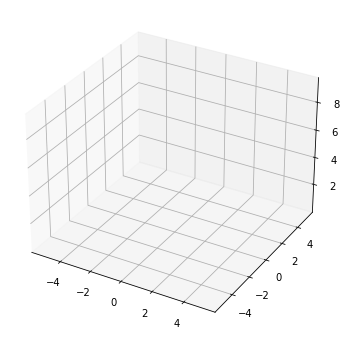

In [17]:
from mpl_toolkits.mplot3d import axes3d
ux=kx_grid/(DonSub.k0 * NA)
uy=ky_grid/(DonSub.k0 * NA)
uz=np.sqrt(1-ux**2-uy**2)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(ux*PatternUp, uy*PatternUp, uz*PatternUp, cmap='jet')
#surf2 = ax1.plot_surface(-ux*PatternDn, -uy*PatternDn, -uz*PatternDn, cmap='jet')
# fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=1)

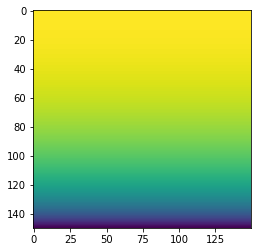

In [21]:
fig1=plt.figure()
plt.imshow(PatternDn)

In [22]:
np.sum(np.isnan(PatternUp))

0